In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

passengers = pd.read_csv("../contents/AirPassengers.csv", parse_dates=[0], index_col=0)
passengers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [34]:
def split_xy(data, time_step):
    x, y = [], []
    for i in range(len(data)):
        endpoint = i + time_step
        if endpoint >= len(data):
            break
        x_temp = data[i:endpoint]
        y_temp = data[endpoint]
        x.append(x_temp)
        y.append(y_temp)
    x = np.array(x)
    y = np.array(y)
    return x, y

split_xy(np.arange(1, 31), 5)

(array([[ 1,  2,  3,  4,  5],
        [ 2,  3,  4,  5,  6],
        [ 3,  4,  5,  6,  7],
        [ 4,  5,  6,  7,  8],
        [ 5,  6,  7,  8,  9],
        [ 6,  7,  8,  9, 10],
        [ 7,  8,  9, 10, 11],
        [ 8,  9, 10, 11, 12],
        [ 9, 10, 11, 12, 13],
        [10, 11, 12, 13, 14],
        [11, 12, 13, 14, 15],
        [12, 13, 14, 15, 16],
        [13, 14, 15, 16, 17],
        [14, 15, 16, 17, 18],
        [15, 16, 17, 18, 19],
        [16, 17, 18, 19, 20],
        [17, 18, 19, 20, 21],
        [18, 19, 20, 21, 22],
        [19, 20, 21, 22, 23],
        [20, 21, 22, 23, 24],
        [21, 22, 23, 24, 25],
        [22, 23, 24, 25, 26],
        [23, 24, 25, 26, 27],
        [24, 25, 26, 27, 28],
        [25, 26, 27, 28, 29]]),
 array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30]))

In [35]:
input, target = split_xy(passengers["#Passengers"], 12)
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19960\1241931080.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_temp = data[endpoint]


((105, 12), (27, 12), (105,), (27,))

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Input(12))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))
mc = ModelCheckpoint(filepath="best_model.hdf5", save_best_only=True, verbose=1)
es = EarlyStopping(patience=20)
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[es, mc])


Epoch 1/200
1/4 [======>.......................] - ETA: 2s - loss: 86395.8359 - mae: 279.6292
Epoch 1: val_loss improved from inf to 7549.18994, saving model to best_model.hdf5
4/4 [==============================] - 1s 50ms/step - loss: 59482.1992 - mae: 222.9044 - val_loss: 7549.1899 - val_mae: 63.1265
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 2699.7009 - mae: 39.2849
Epoch 2: val_loss did not improve from 7549.18994
4/4 [==============================] - 0s 10ms/step - loss: 4815.2417 - mae: 55.9406 - val_loss: 47163.3672 - val_mae: 205.6127
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 13322.7061 - mae: 103.1597
Epoch 3: val_loss did not improve from 7549.18994
4/4 [==============================] - 0s 11ms/step - loss: 14964.6904 - mae: 109.9250 - val_loss: 25710.4863 - val_mae: 145.6815
Epoch 4/200
1/4 [======>.......................] - ETA: 0s - loss: 8964.9082 - mae: 81.5866
Epoch 4: val_loss improved from 7549.18994 to 4560.08105, s

C:\Users\Administrator\IdeaProjects\DataAnalysis\Chapter04\AI_Study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 10ms/step - loss: 3853.5547 - mae: 49.2357 - val_loss: 9361.3037 - val_mae: 74.2340
Epoch 7/200
1/4 [======>.......................] - ETA: 0s - loss: 5340.1460 - mae: 59.3678
Epoch 7: val_loss improved from 4560.08105 to 4549.98291, saving model to best_model.hdf5
4/4 [==============================] - 0s 28ms/step - loss: 3155.4556 - mae: 43.0170 - val_loss: 4549.9829 - val_mae: 49.6829
Epoch 8/200
1/4 [======>.......................] - ETA: 0s - loss: 1381.4161 - mae: 29.0700
Epoch 8: val_loss improved from 4549.98291 to 4114.80664, saving model to best_model.hdf5
4/4 [==============================] - 0s 26ms/step - loss: 1378.9049 - mae: 27.4606 - val_loss: 4114.8066 - val_mae: 54.8968
Epoch 9/200
1/4 [======>.......................] - ETA: 0s - loss: 1336.8274 - mae: 30.6009
Epoch 9: val_loss did not improve from 4114.80664
4/4 [==============================] - 0s 10ms/step - loss: 1274.7058 - mae: 28.3838 - val_loss: 5230.0488 - val_mae

In [38]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.hdf5")
best_model.evaluate(X_test, y_test)
r2_score(y_test, model.predict(X_test))

1/1 [==============================] - 0s 88ms/step


0.9503938623742236

1/1 [==============================] - 0s 19ms/step


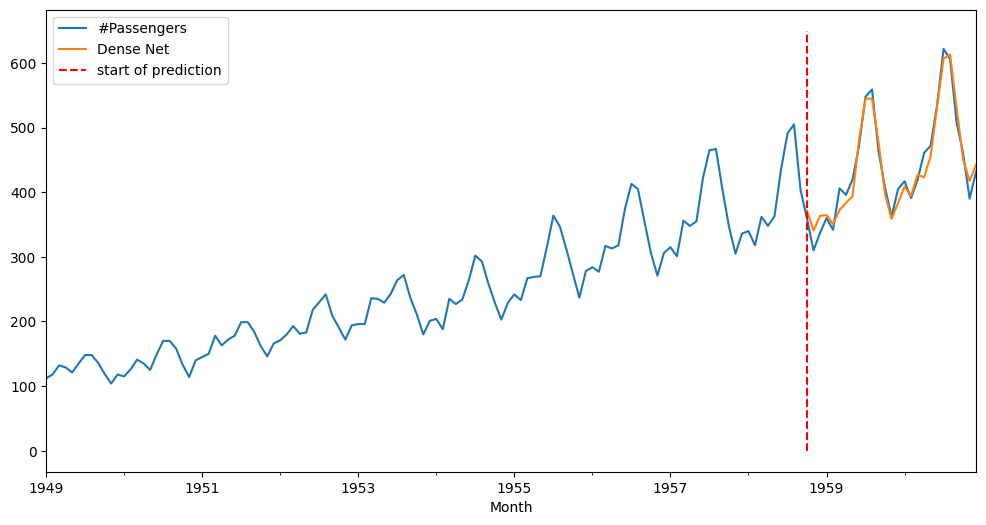

In [39]:
prediction_df=pd.DataFrame(model.predict(X_test), index=passengers.index[-len(y_test):], columns=["Dense Net"])
fig, ax=plt.subplots(figsize=(12,6))
passengers.plot(ax=ax)
prediction_df.plot(ax=ax)
ax.vlines(passengers.index[-len(y_test)], 0, 650,linestyle="--", color="r", label="start of prediction")
ax.legend()
plt.show()